# Visualisation

Here we are visualising the data in different ways

In [4]:
import numpy as np
import nolds
import scipy.io
import mne
import pandas as pd
import seaborn as sns
import pyqtgraph as pg
from scipy.io import loadmat
from scipy import stats
import matplotlib.pyplot as plt
import antropy as ent
from attractors import Attractor
from antropy import higuchi_fd
from pyrqa.settings import Settings
from pyrqa.neighbourhood import FixedRadius
from pyrqa.computation import RQAComputation
from pyrqa.time_series import TimeSeries
from pyrqa.result import RQAResult
from pyrqa.opencl import OpenCL
from pyrqa.settings import Settings
from pyrqa.time_series import TimeSeries
from pyrqa.neighbourhood import FixedRadius
from pyrqa.settings import Settings
from pyrqa.time_series import TimeSeries
from pyrqa.neighbourhood import FixedRadius
from pyrqa.metric import EuclideanMetric
from pyrqa.computation import RQAComputation
from pyrqa.metric import EuclideanMetric
from pyrqa.computation import RQAComputation
from pyrqa.settings import Settings
from pyrqa.neighbourhood import FixedRadius
from pyrqa.metric import EuclideanMetric
from pyrqa.image_generator import ImageGenerator
import numpy as np
import matplotlib.pyplot as plt
from antropy import higuchi_fd

In [5]:
# Load data
data = loadmat('/home/vincent/AAA_projects/MVCS/Neuroscience/downsampled/EEG_DS_Struct_0101.mat')
stim_data = pd.read_excel('/home/vincent/AAA_projects/MVCS/Neuroscience/EEG-tES-Chaos-Neural-Net/Stimulation.xlsx')

# Fill null values in 'Sub#' column
stim_data['Sub#'].fillna(method='ffill', inplace=True)

# Drop the first row
stim_data = stim_data.drop(0)

DSamp = data['DSamp']

# Get data parameters
triggers = DSamp[0][0][0]
EEGdata = DSamp[0][0][1]
fs = DSamp[0][0][2][0][0]
fsOld = DSamp[0][0][3][0][0]
time = DSamp[0][0][4][0]
label = DSamp[0][0][5]
nchan = DSamp[0][0][6][0][0]
rate = DSamp[0][0][7][0][0]
npt = DSamp[0][0][8][0][0]
Subj = DSamp[0][0][9][0]
ptrackerPerf = DSamp[0][0][10]
ptrackerTime = DSamp[0][0][11]
ptrackerfs = DSamp[0][0][12][0][0]

# List of unwanted channel names
unwanted_channels = ['BIP1', 'BIP2', 'RESP1']

# Filter out unwanted channels from the label data
filtered_label = [ch for ch in label if ch[0][0] not in unwanted_channels]

# Convert the filtered list back to numpy array and replace the original label
label = np.array(filtered_label, dtype=object)

print(triggers, EEGdata, label, stim_data)

[[(array([[20.428]]), array([[20429]], dtype=uint16), array(['0002'], dtype='<U4'), array([[2]], dtype=uint8), array(['Block Start'], dtype='<U11'), array([], shape=(1, 0), dtype=float64))
  (array([[619.442]]), array([[619443]], dtype=int32), array(['0002'], dtype='<U4'), array([[2]], dtype=uint8), array(['Block Start'], dtype='<U11'), array([], shape=(1, 0), dtype=float64))
  (array([[619.499]]), array([[619500]], dtype=int32), array(['0016'], dtype='<U4'), array([[16]], dtype=uint8), array(['Stim Start'], dtype='<U10'), array(['M30'], dtype='<U3'))
  (array([[654.746]]), array([[654747]], dtype=int32), array(['0032'], dtype='<U4'), array([[32]], dtype=uint8), array(['Stim Stop'], dtype='<U9'), array([], shape=(1, 0), dtype=float64))
  (array([[770.515]]), array([[770516]], dtype=int32), array(['0016'], dtype='<U4'), array([[16]], dtype=uint8), array(['Stim Start'], dtype='<U10'), array(['M30'], dtype='<U3'))
  (array([[805.571]]), array([[805572]], dtype=int32), array(['0032'], dtyp

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming that EEGdata and time are numpy arrays
EEGdata = np.array(EEGdata)
time = np.array(time)

# Checking the number of channels
nchan = EEGdata.shape[0]

# Creating a figure with nchan subplots, one for each channel
fig, axs = plt.subplots(nchan, 1)

# Setting the figure size
fig.set_size_inches(10, 2*nchan)

# Loop over all the channels
for i in range(nchan):
    axs[i].plot(time, EEGdata[i], label='Channel '+str(i+1))  # Use the entire 'time' array
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Amplitude')
    axs[i].legend()


# Automatically adjust subplot params so the subplot(s) fits into the figure area
plt.tight_layout()

# Display the plot
plt.show()

KeyboardInterrupt: 

In the below code, maybe we can simplify the event structure so that it is less expensive

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne

# Assuming you have already extracted the relevant data from your structure
EEGdata = DSamp[0][0][1]
fs = DSamp[0][0][2][0][0]
nchan = 35  # Update with the actual number of channels in your data

# Reshape the EEG data
EEGdata = EEGdata.reshape(nchan, -1)

# Create a raw MNE object
info = mne.create_info(ch_names=nchan, sfreq=fs, ch_types='eeg')
raw = mne.io.RawArray(data=EEGdata, info=info)

# Create events
stim_start_times = DSamp[0][0][4][0]
stim_start_times = stim_start_times.astype(int)  # Convert to integer type
events = np.column_stack((stim_start_times, np.zeros_like(stim_start_times), np.ones_like(stim_start_times)))

# Assign event IDs
event_id = {'Stimulus': 1}

# Apply event-related potentials (ERPs) analysis
epochs = mne.Epochs(raw, events, event_id, tmin=-0.2, tmax=0.5, preload=True)

# Plot the epochs
epochs.plot()

# Perform additional analyses on the epochs data
# For example, compute power spectral density (PSD)
psds, freqs = mne.time_frequency.psd_multitaper(epochs, fmin=1, fmax=40, n_jobs=1)

# Plot the PSD
plt.plot(freqs, psds.mean(0).mean(0))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.show()

Creating RawArray with float64 data, n_channels=35, n_times=4227788
    Range : 0 ... 4227787 =      0.000 ...  4227.787 secs
Ready.


KeyboardInterrupt: 

ValueError: setting an array element with a sequence.

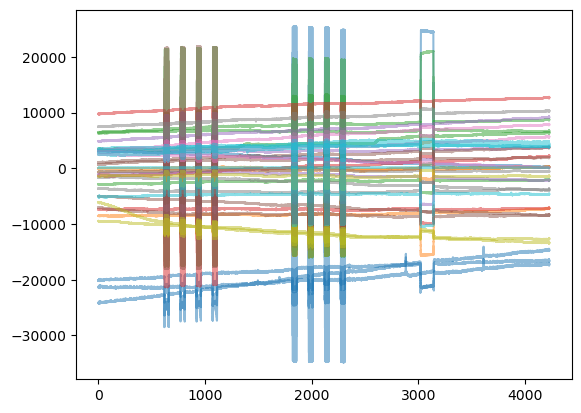

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already extracted the relevant data from your structure
EEGdata = DSamp[0][0][1]
fs = DSamp[0][0][2][0][0]
nchan = 35  # Update with the actual number of channels in your data
time = DSamp[0][0][4][0]

# Reshape the EEG data
EEGdata = EEGdata.reshape(nchan, -1)

# Plot EEG data
fig, ax = plt.subplots()

colors = plt.cm.get_cmap('tab10', nchan)  # Get a colormap with nchan colors

for i in range(nchan):
    ax.plot(time, eeg_data[i], color=colors(i), alpha=0.5)

# Plot stimulation data
stim_start_times = DSamp[0][0][4][0].astype(float)  # Convert to numeric
stim_stop_times = DSamp[0][0][5][0].astype(float)  # Convert to numeric

for start, stop in zip(stim_start_times, stim_stop_times):
    ax.axvspan(start, stop, color='red', alpha=0.3)

# Set plot labels and title
ax.set_xlabel('Time')
ax.set_ylabel('EEG Amplitude')
ax.set_title('EEG Data with Stimulation')

# Show the plot
plt.show()